In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn import metrics

# Load data from the provided URL
url = "https://raw.githubusercontent.com/brianalbertsen13/Capstone_MDA620_Albertsen/main/MDA620Capstone.csv"
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
df.head()

,Player,From,To,Yrs,GP,G,A,PTS,+/-,PIM,...,SH,GW,EV.1,PP.1,SH.1,S,S%,TOI,ATOI,-9999
0,Clarence Abel,1927,1929,3,111,11,6,17,NaN,151,...,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,abelcl01
1,Douglas Adam,1950,1950,1,4,0,1,1,NaN,0,...,0.0,0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,adamdo01
2,Lloyd Ailsby,1952,1952,1,3,0,0,0,NaN,2,...,0.0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,ailsbll01
3,Clint Albright,1949,1949,1,59,14,5,19,NaN,19,...,0.0,1,2.0,3.0,0.0,NaN,NaN,NaN,NaN,albricl01
4,Conor Allen,2014,2015,2,7,0,0,0,-2.0,4,...,0.0,0,0.0,0.0,0.0,4.0,0.0,92.0,13:10,allenco01


In [3]:
#dictionary with the old column names as keys and the new column names as values
new_column_names = {
    'From': 'Start',
    'To': 'End',
    'Yrs': 'Years',
    'GP': 'Games Played',
    'G': 'Goals',
    'A': 'Assists',
    'PTS': 'Points',
    'PIM': 'Penalty Minutes',
    'EV': 'Even Strength Goals',
    'PP': 'Power Play Goals',
    'SH': 'Short Handed Goals',
    'GW': 'Game Winning Goals',
    'EV.1': 'Even Strength Assists',
    'PP.1': 'Power Play Assists',
    'SH.1': 'Short Handed Assists',
    'S': 'Shots On Goal',
    'S%': 'Shooting Percentage',
    'TOI': 'Time on Ice',
    'ATOI': 'Average Time on Ice'
}

# Rename the columns
df = df.rename(columns=new_column_names)
df.head(3)

,Player,Start,End,Years,Games Played,Goals,Assists,Points,+/-,Penalty Minutes,...,Short Handed Goals,Game Winning Goals,Even Strength Assists,Power Play Assists,Short Handed Assists,Shots On Goal,Shooting Percentage,Time on Ice,Average Time on Ice,-9999
0,Clarence Abel,1927,1929,3,111,11,6,17,NaN,151,...,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,abelcl01
1,Douglas Adam,1950,1950,1,4,0,1,1,NaN,0,...,0.0,0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,adamdo01
2,Lloyd Ailsby,1952,1952,1,3,0,0,0,NaN,2,...,0.0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,ailsbll01


In [5]:
# List of columns to delete
columns_to_delete = ['Time on Ice', 'Average Time on Ice',]

# Drop the specified columns
df = df.drop(columns=columns_to_delete, errors='ignore')
df.head(3)

,Player,Start,End,Years,Games Played,Goals,Assists,Points,+/-,Penalty Minutes,Even Strength Goals,Power Play Goals,Short Handed Goals,Game Winning Goals,Even Strength Assists,Power Play Assists,Short Handed Assists,Shots On Goal,Shooting Percentage,-9999
0,Clarence Abel,1927,1929,3,111,11,6,17,NaN,151,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,abelcl01
1,Douglas Adam,1950,1950,1,4,0,1,1,NaN,0,0.0,0.0,0.0,0,1.0,0.0,0.0,NaN,NaN,adamdo01
2,Lloyd Ailsby,1952,1952,1,3,0,0,0,NaN,2,0.0,0.0,0.0,0,0.0,0.0,0.0,NaN,NaN,ailsbll01


In [6]:
# Display the current column names
print("Before:", df.columns)

# Drop the column with the exact name '-9999'
df = df.drop(columns=['-9999'], errors='ignore')

# Display the DataFrame after removing the specified column
print("After:", df)


Before: Index(['Player', 'Start', 'End', 'Years', 'Games Played', 'Goals', 'Assists',
       'Points', '+/-', 'Penalty Minutes', 'Even Strength Goals',
       'Power Play Goals', 'Short Handed Goals', 'Game Winning Goals',
       'Even Strength Assists', 'Power Play Assists', 'Short Handed Assists',
       'Shots On Goal', 'Shooting Percentage', '-9999'],
      dtype='object')
After:                Player  Start   End  Years  Games Played  Goals  Assists  \
0       Clarence Abel   1927  1929      3           111     11        6   
1        Douglas Adam   1950  1950      1             4      0        1   
2        Lloyd Ailsby   1952  1952      1             3      0        0   
3      Clint Albright   1949  1949      1            59     14        5   
4         Conor Allen   2014  2015      2             7      0        0   
...               ...    ...   ...    ...           ...    ...      ...   
1015      Joe Zanussi   1975  1975      1             8      0        2   
1016  Nikolai

In [8]:
# Drop columns with no name (NaN)
df = df.loc[:, ~df.columns.isna()]
df.head(3)

,Player,Start,End,Years,Games Played,Goals,Assists,Points,+/-,Penalty Minutes,Even Strength Goals,Power Play Goals,Short Handed Goals,Game Winning Goals,Even Strength Assists,Power Play Assists,Short Handed Assists,Shots On Goal,Shooting Percentage
0,Clarence Abel,1927,1929,3,111,11,6,17,NaN,151,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN
1,Douglas Adam,1950,1950,1,4,0,1,1,NaN,0,0.0,0.0,0.0,0,1.0,0.0,0.0,NaN,NaN
2,Lloyd Ailsby,1952,1952,1,3,0,0,0,NaN,2,0.0,0.0,0.0,0,0.0,0.0,0.0,NaN,NaN


In [9]:
# Count the number of missing values per column
missing_values = df.isnull().sum()

# Display the number of missing values per column
print(missing_values)

Player                     0
Start                      0
End                        0
Years                      0
Games Played               0
Goals                      0
Assists                    0
Points                     0
+/-                      239
Penalty Minutes            0
Even Strength Goals       35
Power Play Goals          35
Short Handed Goals        35
Game Winning Goals         0
Even Strength Assists     35
Power Play Assists        35
Short Handed Assists      35
Shots On Goal            239
Shooting Percentage      257
dtype: int64


In [11]:
#Look into the data and its Dtypes
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Player                 1020 non-null   object 
 1   Start                  1020 non-null   int64  
 2   End                    1020 non-null   int64  
 3   Years                  1020 non-null   int64  
 4   Games Played           1020 non-null   int64  
 5   Goals                  1020 non-null   int64  
 6   Assists                1020 non-null   int64  
 7   Points                 1020 non-null   int64  
 8   +/-                    781 non-null    float64
 9   Penalty Minutes        1020 non-null   int64  
 10  Even Strength Goals    985 non-null    float64
 11  Power Play Goals       985 non-null    float64
 12  Short Handed Goals     985 non-null    float64
 13  Game Winning Goals     1020 non-null   int64  
 14  Even Strength Assists  985 non-null    float64
 15  Powe

,Start,End,Years,Games Played,Goals,Assists,Points,+/-,Penalty Minutes,Even Strength Goals,Power Play Goals,Short Handed Goals,Game Winning Goals,Even Strength Assists,Power Play Assists,Short Handed Assists,Shots On Goal,Shooting Percentage
count,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,781.000000,1020.000000,985.000000,985.000000,985.000000,1020.000000,985.000000,985.000000,985.000000,781.000000,763.000000
mean,1981.503922,1983.332353,2.607843,108.920588,20.128431,32.251961,52.380392,0.749040,84.198039,14.867005,4.606091,0.586802,2.848039,23.659898,8.403046,0.645685,195.261204,7.583879
std,27.029860,26.750993,2.500469,159.478974,43.354532,67.141658,107.693812,23.924636,154.016287,30.363643,12.605134,1.786589,6.283102,45.075378,24.253258,1.871737,368.776572,6.556757
min,1927.000000,1927.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-117.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,1961.000000,1.000000,12.000000,0.000000,1.000000,2.000000,-6.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.000000,2.450000
50%,1987.000000,1988.000000,2.000000,45.000000,4.000000,6.000000,11.000000,-1.000000,23.000000,3.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,52.000000,7.100000
75%,2004.000000,2004.000000,3.000000,139.000000,16.000000,30.000000,47.000000,3.000000,88.000000,13.000000,3.000000,0.000000,2.000000,24.000000,5.000000,0.000000,193.000000,11.500000
max,2024.000000,2024.000000,18.000000,1160.000000,406.000000,741.000000,1021.000000,184.000000,1226.000000,298.000000,116.000000,23.000000,52.000000,400.000000,408.000000,28.000000,3469.000000,57.100000


In [14]:
# Filter rows where 'Games Played' is greater than or equal to 82, which is equal to one season
df_filtered = df[df['Games Played'] >= 82]

# Sort the filtered DataFrame by the 'Games Played' column in descending order
df_sorted = df_filtered.sort_values(by='Games Played', ascending=False)

# Display the sorted DataFrame
df_sorted.head(5)
#df_sorted.tail(3)

,Player,Start,End,Years,Games Played,Goals,Assists,Points,+/-,Penalty Minutes,Even Strength Goals,Power Play Goals,Short Handed Goals,Game Winning Goals,Even Strength Assists,Power Play Assists,Short Handed Assists,Shots On Goal,Shooting Percentage
399,Harry Howell*,1953,1969,17,1160,82,263,345,-77.0,1147,69.0,12.0,1.0,12,181.0,78.0,4.0,1701.0,3.4
533,Brian Leetch*,1988,2004,17,1129,240,741,981,24.0,525,126.0,106.0,8.0,37,320.0,408.0,13.0,3469.0,6.9
299,Rod Gilbert*,1961,1978,18,1065,406,615,1021,38.0,510,298.0,108.0,0.0,52,400.0,215.0,0.0,3142.0,12.9
329,Ron Greschner,1975,1990,16,981,179,431,610,-84.0,1226,122.0,51.0,6.0,18,255.0,171.0,5.0,1877.0,9.5
942,Walt Tkaczuk,1968,1981,14,945,227,451,678,184.0,556,175.0,41.0,11.0,23,360.0,73.0,18.0,2156.0,10.5


In [15]:
df_sorted.describe()

,Start,End,Years,Games Played,Goals,Assists,Points,+/-,Penalty Minutes,Even Strength Goals,Power Play Goals,Short Handed Goals,Game Winning Goals,Even Strength Assists,Power Play Assists,Short Handed Assists,Shots On Goal,Shooting Percentage
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,288.000000,360.000000,356.000000,356.000000,356.000000,360.000000,356.000000,356.000000,356.00000,288.000000,288.000000
mean,1981.188889,1985.408333,4.819444,261.794444,52.202778,83.661111,135.863889,5.802083,204.316667,37.407303,11.828652,1.536517,7.480556,59.415730,21.747191,1.69382,476.180556,9.551389
std,26.118924,25.142545,3.054411,187.123771,60.898889,92.946546,148.178582,38.134446,208.016899,41.693514,18.847838,2.705511,8.817851,59.896165,36.652892,2.80524,491.944406,4.399073
min,1927.000000,1929.000000,1.000000,82.000000,1.000000,1.000000,9.000000,-117.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
25%,1960.000000,1964.000000,3.000000,133.000000,12.750000,24.750000,40.750000,-13.250000,72.000000,9.000000,1.000000,0.000000,2.000000,21.000000,2.000000,0.00000,165.750000,6.000000
50%,1984.500000,1989.000000,4.000000,201.000000,28.000000,51.000000,79.500000,1.000000,130.500000,21.000000,5.000000,0.000000,4.000000,36.000000,9.000000,1.00000,293.500000,9.700000
75%,2003.000000,2006.250000,6.000000,322.500000,65.000000,105.500000,184.000000,20.000000,260.500000,50.000000,14.000000,2.000000,10.000000,76.250000,26.250000,2.00000,611.500000,12.700000
max,2023.000000,2024.000000,18.000000,1160.000000,406.000000,741.000000,1021.000000,184.000000,1226.000000,298.000000,116.000000,23.000000,52.000000,400.000000,408.000000,28.00000,3469.000000,22.200000


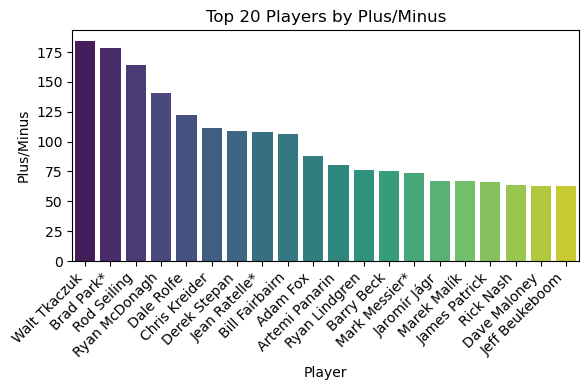

In [60]:
plus_minus_data = df_sorted[['Player', '+/-']]

# Get top 20 players by plus/minus
top_20_players = plus_minus_data.nlargest(20, '+/-')

# Plotting
plt.figure(figsize=(6, 4))

# Bar chart for top 20 plus/minus
sns.barplot(x='Player', y='+/-', data=top_20_players, palette='viridis')

# Adding labels and title
plt.xlabel('Player')
plt.ylabel('Plus/Minus')
plt.title('Top 20 Players by Plus/Minus')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

/var/folders/l4/mjdss2w94_90gkq9l3lzpnqh0000gn/T/ipykernel_37198/765125012.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_sorted.corr()


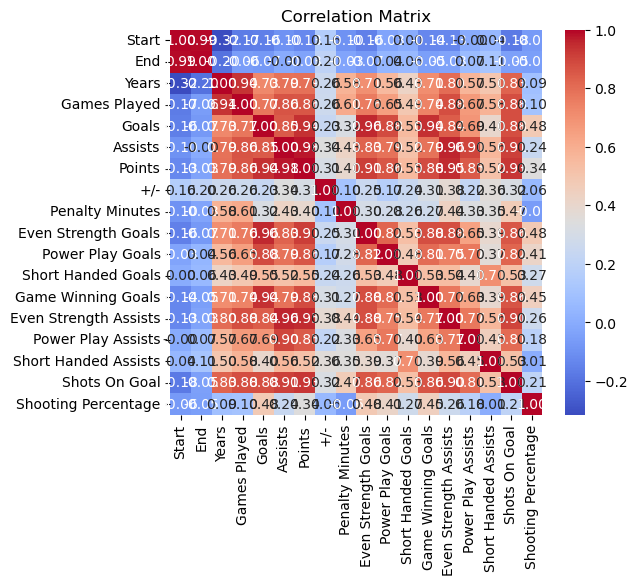

In [54]:
# Data Exploration
# Visualize the correlation matrix
correlation_matrix = df_sorted.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

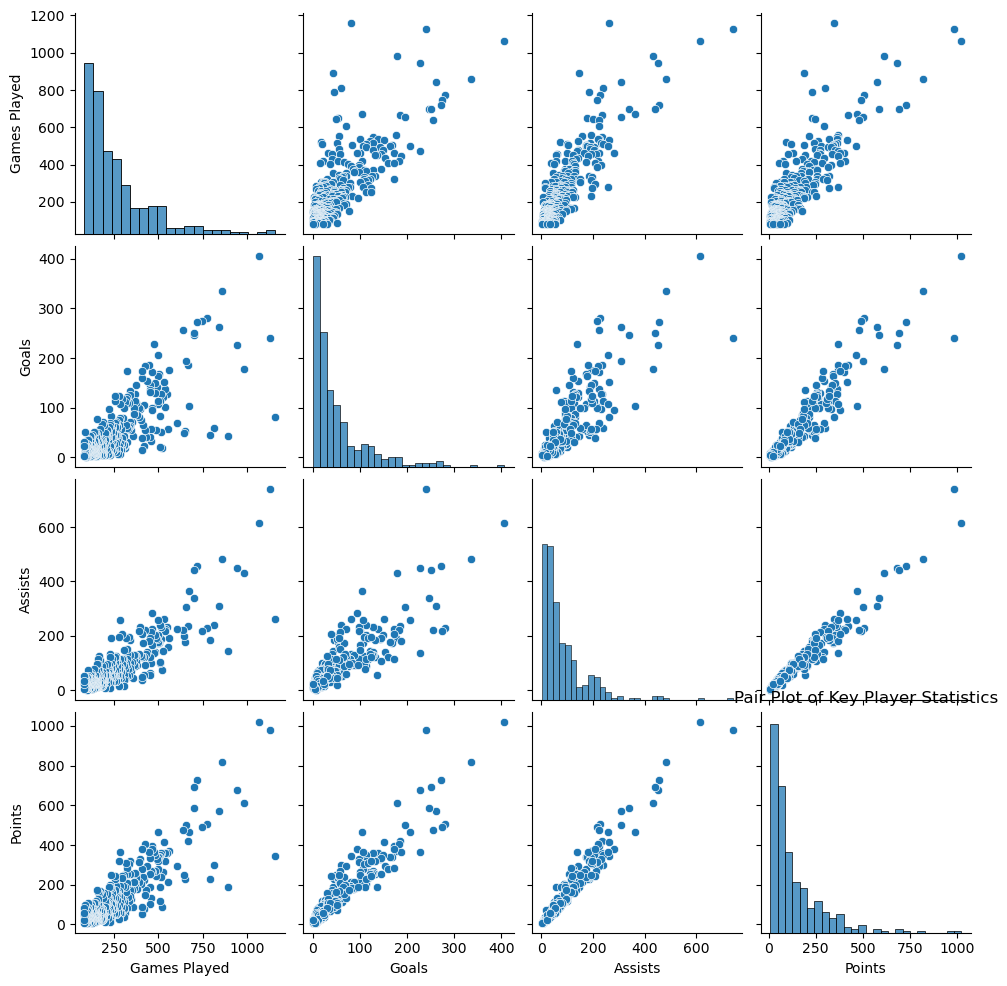

In [20]:
# Pair plot for key variables
sns.pairplot(df_sorted[['Games Played', 'Goals', 'Assists', 'Points']])
plt.title('Pair Plot of Key Player Statistics')
plt.show()

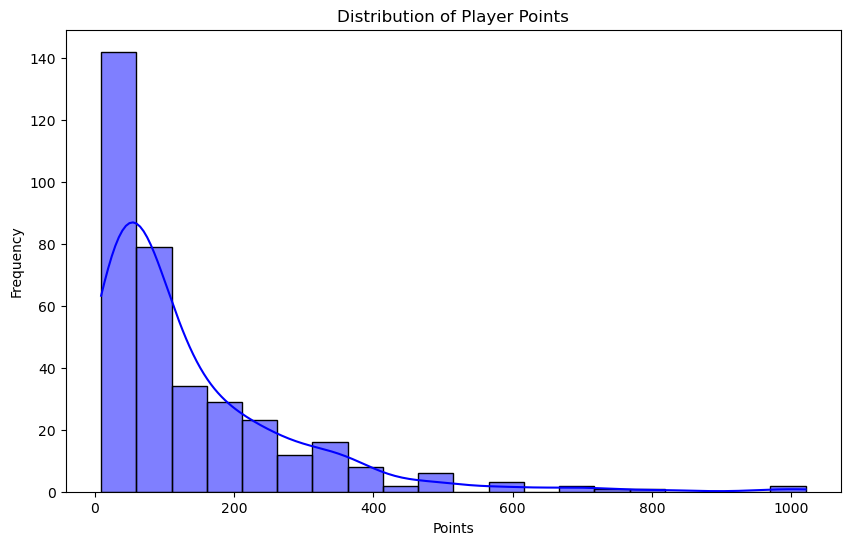

In [21]:
# Histogram of Player Points
plt.figure(figsize=(10, 6))
sns.histplot(df_sorted['Points'], bins=20, kde=True, color='blue')
plt.title('Distribution of Player Points')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()

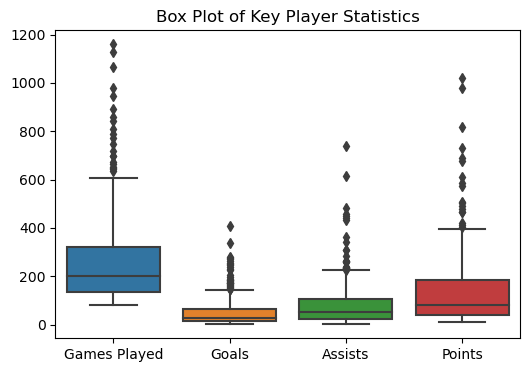

In [51]:
# Box plot for key variables
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_sorted[['Games Played', 'Goals', 'Assists', 'Points']])
plt.title('Box Plot of Key Player Statistics')
plt.show()

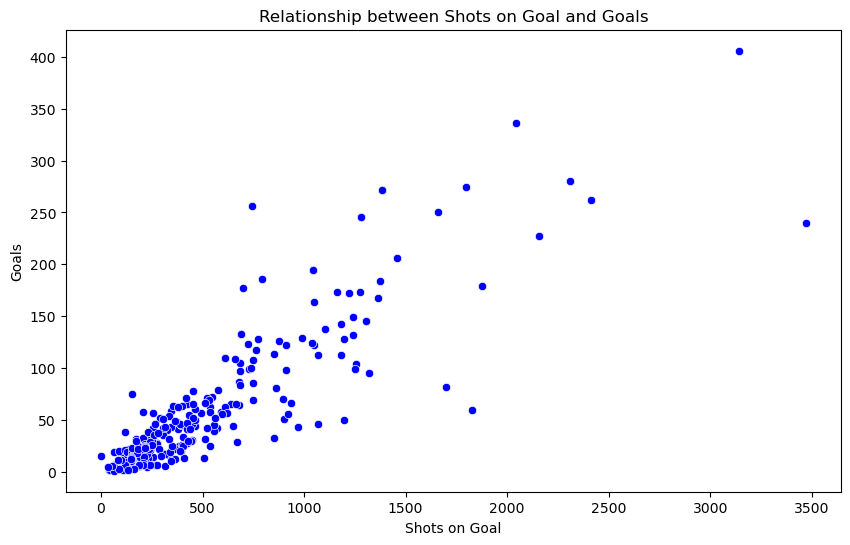

In [23]:
# Scatter plot for Shots on Goal vs. Goals
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Shots On Goal', y='Goals', data=df_sorted, color='blue')
plt.title('Relationship between Shots on Goal and Goals')
plt.xlabel('Shots on Goal')
plt.ylabel('Goals')
plt.show()

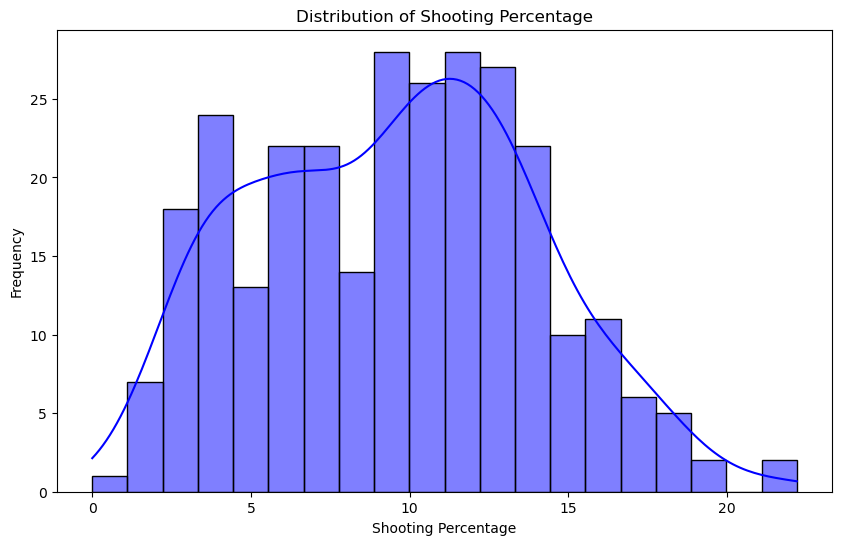

In [24]:
# Histogram of Shooting Percentage
plt.figure(figsize=(10, 6))
sns.histplot(df_sorted['Shooting Percentage'], bins=20, kde=True, color='blue')
plt.title('Distribution of Shooting Percentage')
plt.xlabel('Shooting Percentage')
plt.ylabel('Frequency')
plt.show()

Linear Regression Model Evaluation:
Mean Absolute Error: 7.534713593789395e-14
Mean Squared Error: 1.1975522099736797e-26
Root Mean Squared Error: 1.0943272864978191e-13


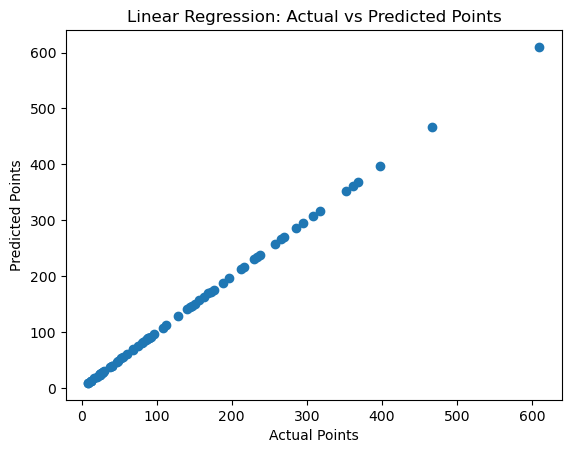

In [28]:
# Select relevant features for linear regression
features = df_sorted[['Goals', 'Assists', 'Games Played']]
target = df_sorted['Points']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Linear Regression Model Building
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Model Evaluation
print("Linear Regression Model Evaluation:")
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, predictions))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, predictions))
print("Root Mean Squared Error:", metrics.mean_squared_error(y_test, predictions)**0.5)

# Plot predicted vs actual values
plt.scatter(y_test, predictions)
plt.xlabel("Actual Points")
plt.ylabel("Predicted Points")
plt.title("Linear Regression: Actual vs Predicted Points")
plt.show()

Linear Regression Model Evaluation:
Mean Absolute Error: 23.429658872071375
Mean Squared Error: 1275.5811999779285
Root Mean Squared Error: 35.715279643003335


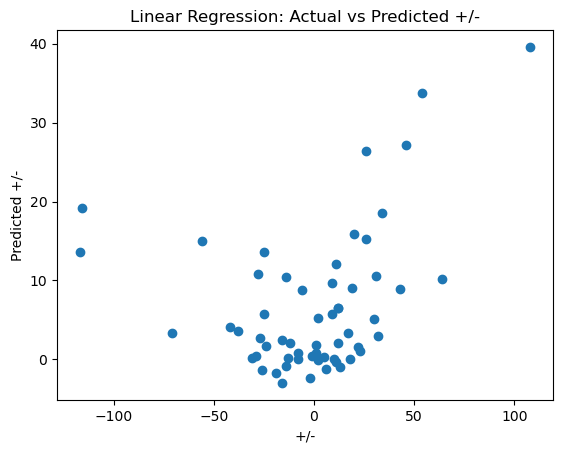

In [49]:
# Data Manipulation
# Handle missing values by dropping them
df_sorted2 = df_sorted.dropna()

# Select features for linear regression
features = df_sorted2[['Goals', 'Assists', 'Points','Shots On Goal']]
target = df_sorted2['+/-']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Linear Regression Model Building
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Model Evaluation
print("Linear Regression Model Evaluation:")
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, predictions))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, predictions))
print("Root Mean Squared Error:", metrics.mean_squared_error(y_test, predictions)**0.5)

# Plot predicted vs actual values
plt.scatter(y_test, predictions)
plt.xlabel("+/-")
plt.ylabel("Predicted +/-")
plt.title("Linear Regression: Actual vs Predicted +/-")
plt.show()

Linear Regression Model Evaluation:
Mean Absolute Error: 23.524257334965203
Mean Squared Error: 1240.6098897019767
Root Mean Squared Error: 35.22229251059586


Text(0.5, 1.0, 'Linear Regression: Actual vs Predicted +/-')

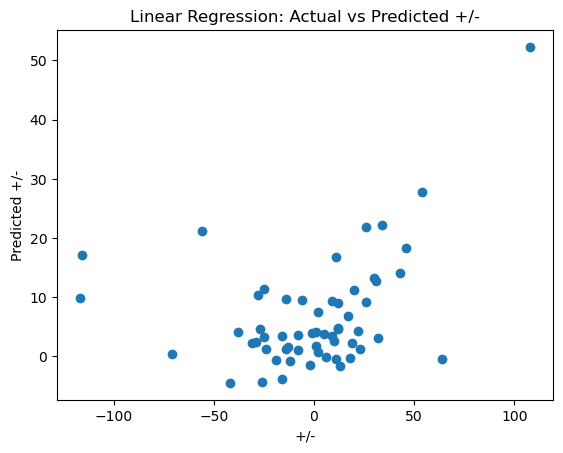

In [58]:
# Data Manipulation
# Handle missing values by dropping them
df_sorted2 = df_sorted.dropna()

# Select features for linear regression
features = df_sorted2[['Goals', 'Assists', 'Points', 'Penalty Minutes']]
target = df_sorted2['+/-']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Linear Regression Model Building
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Model Evaluation
print("Linear Regression Model Evaluation:")
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, predictions))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, predictions))
print("Root Mean Squared Error:", metrics.mean_squared_error(y_test, predictions)**0.5)

# Plot predicted vs actual values
plt.scatter(y_test, predictions)
plt.xlabel("+/-")
plt.ylabel("Predicted +/-")
plt.title("Linear Regression: Actual vs Predicted +/-")

Linear Regression Model Evaluation:
Mean Absolute Error: 23.39292939900237
Mean Squared Error: 1251.9555763240232
Root Mean Squared Error: 35.38298427668338


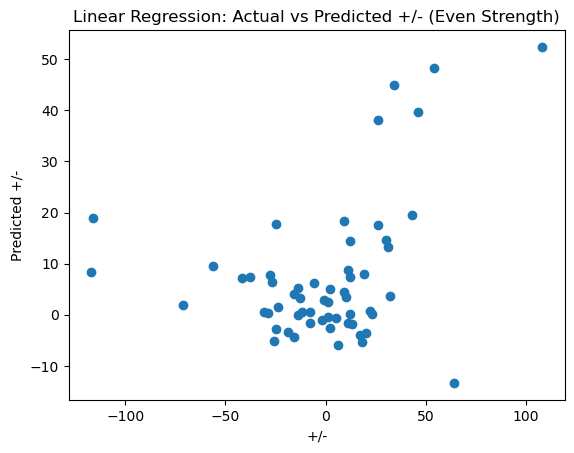

In [57]:
# Data Manipulation
# Handle missing values by dropping them
df_sorted2 = df_sorted.dropna()

# Select features for linear regression
features = df_sorted2[['Even Strength Goals', 'Even Strength Assists']]
target = df_sorted2['+/-']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Linear Regression Model Building
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Model Evaluation
print("Linear Regression Model Evaluation:")
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, predictions))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, predictions))
print("Root Mean Squared Error:", metrics.mean_squared_error(y_test, predictions)**0.5)

# Plot predicted vs actual values
plt.scatter(y_test, predictions)
plt.xlabel("+/-")
plt.ylabel("Predicted +/-")
plt.title("Linear Regression: Actual vs Predicted +/- (Even Strength)")
plt.show()

Linear Regression Model Evaluation:
Mean Absolute Error: 23.057578493314985
Mean Squared Error: 1286.0818283782673
Root Mean Squared Error: 35.86198305139117


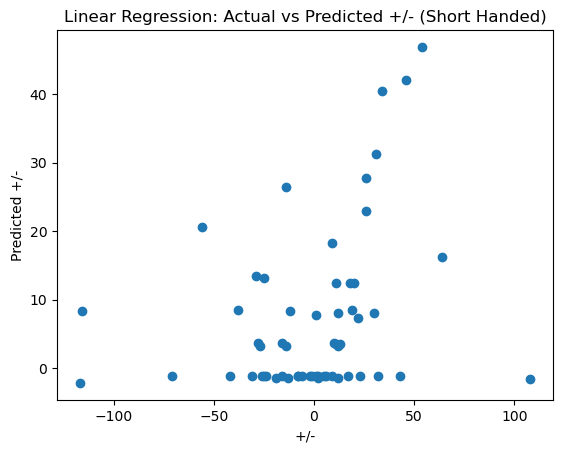

In [56]:
# Data Manipulation
# Handle missing values by dropping them
df_sorted2 = df_sorted.dropna()

# Select features for linear regression
features = df_sorted2[['Short Handed Goals', 'Short Handed Assists']]
target = df_sorted2['+/-']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Linear Regression Model Building
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Model Evaluation
print("Linear Regression Model Evaluation:")
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, predictions))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, predictions))
print("Root Mean Squared Error:", metrics.mean_squared_error(y_test, predictions)**0.5)

# Plot predicted vs actual values
plt.scatter(y_test, predictions)
plt.xlabel("+/-")
plt.ylabel("Predicted +/-")
plt.title("Linear Regression: Actual vs Predicted +/- (Short Handed)")
plt.show()

In [37]:
from sklearn.impute import SimpleImputer
df = df.dropna(subset=['Games Played', 'Goals', 'Assists', 'Points', 'Penalty Minutes',
                        'Even Strength Goals', 'Power Play Goals', 'Short Handed Goals',
                        'Game Winning Goals', 'Even Strength Assists', 'Power Play Assists',
                        'Short Handed Assists', 'Shots On Goal', 'Shooting Percentage', '+/-'])

# Separate features and target variable
X = df_sorted2[['Games Played', 'Goals', 'Assists', 'Points', 'Penalty Minutes',
        'Even Strength Goals', 'Power Play Goals', 'Short Handed Goals',
        'Game Winning Goals', 'Even Strength Assists', 'Power Play Assists',
        'Short Handed Assists', 'Shots On Goal', 'Shooting Percentage']]
y = df_sorted2['+/-']  # Target variable (plus/minus)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Get the coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})

# Display the coefficients
print(coefficients)

                  Feature  Coefficient
0            Games Played    -0.163416
1                   Goals    -0.926866
2                 Assists     0.994178
3                  Points     0.067312
4         Penalty Minutes     0.003086
5     Even Strength Goals    -0.134142
6        Power Play Goals     0.716963
7      Short Handed Goals    -1.509687
8      Game Winning Goals     2.538672
9   Even Strength Assists    -0.102562
10     Power Play Assists    -1.591510
11   Short Handed Assists     2.688250
12          Shots On Goal     0.041908
13    Shooting Percentage     0.607702


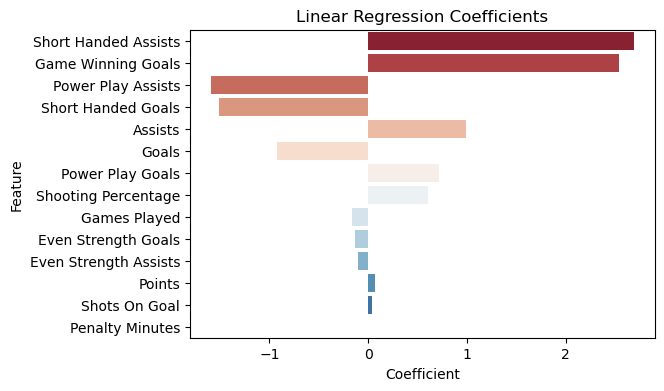

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
# Sort coefficients by absolute values for better visualization
coefficients['Absolute Coefficient'] = abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values(by='Absolute Coefficient', ascending=False)

# Create a red and blue color palette using the RdBu colormap
colors = sns.color_palette("RdBu", n_colors=len(coefficients))

# Plotting with the custom color palette
plt.figure(figsize=(6, 4))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette=colors)
plt.title('Linear Regression Coefficients')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

In [59]:
features = df_sorted[['Short Handed Goals', 'Short Handed Assists']]
target = df_sorted['+/-']  # Target variable (plus/minus)

# Check for and handle missing values in the target variable
if target.isnull().any():
    target = target.fillna(target.mean())  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Impute missing values in features
imputer = SimpleImputer(strategy='mean')  
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train_imputed, y_train)
linear_predictions = linear_model.predict(X_test_imputed)

# Decision Tree Model
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train_imputed, y_train)
tree_predictions = tree_model.predict(X_test_imputed)

# Random Forest Model
forest_model = RandomForestRegressor()
forest_model.fit(X_train_imputed, y_train)
forest_predictions = forest_model.predict(X_test_imputed)

# Model Evaluation
def evaluate_model(model_name, y_true, y_pred):
    print(f"{model_name} Model Evaluation:")
    print("Mean Absolute Error:", metrics.mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error:", metrics.mean_squared_error(y_true, y_pred))
    print("Root Mean Squared Error:", metrics.mean_squared_error(y_true, y_pred)**0.5)

evaluate_model("Linear Regression", y_test, linear_predictions)
evaluate_model("Decision Tree", y_test, tree_predictions)
evaluate_model("Random Forest", y_test, forest_predictions)

Linear Regression Model Evaluation:
Mean Absolute Error: 21.4703539472217
Mean Squared Error: 1067.9234540051016
Root Mean Squared Error: 32.679098121048284
Decision Tree Model Evaluation:
Mean Absolute Error: 27.77799013238463
Mean Squared Error: 1802.121440330564
Root Mean Squared Error: 42.451400923062174
Random Forest Model Evaluation:
Mean Absolute Error: 22.305025474853963
Mean Squared Error: 1118.687311251472
Root Mean Squared Error: 33.44678327210962
